In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt

from src.utils.vis_utils import get_df, average_df, get_training_data

In [29]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [30]:
root = "output_dir"
df_list=[]
pattern = f"{root}/*/sup_vitb16_imagenet21k/*/*/test/*/*/*/*/logs.txt"
files = glob.glob(pattern)
print(files)
df = get_df(files, is_best=True, is_last=False)
df['training_data'] = df['file'].map(lambda x: get_training_data(x))
#         df = get_df(files, f"seed{seed}", root, is_best=False, is_last=True)
#         if df is None:
#             continue
#         df["seed"] = seed
#         df_list.append(df)
# df = pd.concat(df_list)
# df["type"] = "VPT"

['output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed875/lr0.0001_wd0.0001/patience21/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed875/lr0.0001_wd0.0001/patience14/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed875/lr0.0001_wd0.0001/patience7/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed9805/lr0.0001_wd0.0001/patience21/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed9805/lr0.0001_wd0.0001/patience14/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed9805/lr0.0001_wd0.0001/patience7/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed3172/lr0.0001_wd0.0001/patience21/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed3172/lr0.0001_wd0.0001/patience14/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_im

100%|██████████| 129/129 [00:00<00:00, 1157.79it/s]

test_top1 2 [6.35, 6.17]
job output_dir/vtab-dsprites(predicted_attribute="label_orientation",num_classes=16)/sup_vitb16_imagenet21k/prompt50/crop224/test/seed9805/lr0.1_wd0.001/patience300/run1/logs.txt not ready


In [31]:
display(df)

,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data
0,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,875,0.0001,0.0001,87569666,87569666,100.0000,4,21,67.07,64.65,6,27,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:24:44,"([1.8801, 0.8655, 0.7746, 0.7298, 0.7426, 0.69..."
1,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,875,0.0001,0.0001,87569666,87569666,100.0000,4,14,66.67,61.71,4,24,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 04:57:43,"([1.8801, 0.8657, 0.7744, 0.7295, 0.7448, 0.69..."
2,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,875,0.0001,0.0001,87569666,87569666,100.0000,4,7,67.89,61.86,10,17,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 03:29:25,"([1.8801, 0.866, 0.7746, 0.7305, 0.7447, 0.696..."
3,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,9805,0.0001,0.0001,87569666,87569666,100.0000,4,21,67.48,62.64,12,33,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 06:35:24,"([2.826, 0.9712, 0.7674, 0.7345, 0.7432, 0.700..."
4,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,9805,0.0001,0.0001,87569666,87569666,100.0000,4,14,65.85,60.78,3,21,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 04:20:38,"([2.826, 0.9715, 0.7682, 0.7352, 0.7467, 0.696..."
5,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,9805,0.0001,0.0001,87569666,87569666,100.0000,4,7,67.07,63.57,12,19,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 03:53:57,"([2.826, 0.9702, 0.7672, 0.7364, 0.7434, 0.700..."
6,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,3172,0.0001,0.0001,87569666,87569666,100.0000,4,21,71.14,62.33,3,27,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:25:08,"([4.2771, 0.9733, 0.7445, 0.7268, 0.6936, 0.67..."
7,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,3172,0.0001,0.0001,87569666,87569666,100.0000,4,14,71.14,62.64,3,25,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:10:03,"([4.2771, 0.9733, 0.7448, 0.7268, 0.6942, 0.70..."
8,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,3172,0.0001,0.0001,87569666,87569666,100.0000,4,7,70.73,62.33,3,13,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 02:39:50,"([4.2771, 0.9732, 0.7458, 0.7278, 0.6962, 0.67..."
9,mammo-cbis,sup_vitb16_imagenet21k,end2end,800,False,test,8393,0.0001,0.0001,87569666,87569666,100.0000,4,21,66.26,64.50,5,27,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:24:59,"([2.1069, 0.904, 0.7843, 0.7385, 0.7194, 0.704..."


In [32]:
img_sizes = set([(row.img_size, row.cropped) for index, row in df[['img_size', 'cropped']].iterrows()])
print(img_sizes)
averages_per_img_size = []
for (img_size, cropped) in img_sizes:
    df_for_crop = df.where((df["cropped"]==cropped) & (df['img_size']==img_size)).dropna()
    # print(len(df_for_crop))
    # display(df_for_crop)
    average_df(df_for_crop, metric_names=["b-test_top1"], take_average=True)
    averages_per_img_size.append(average_df(df_for_crop, metric_names=["b-test_top1"], take_average=True))

avg_df = pd.concat(averages_per_img_size)
display(avg_df.sort_values('data'))
# f_df = average_df(df, metric_names=["b-test_top1"], take_average=True)
# f_df

{(896, True), (800, False), (500, False), (224, True), (672, True), (384, True)}


,data,feature,transfer,total_runs,b-test_top1,b-test_top1-std,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,total_epochs,total_time,training_data
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,59.53,2.57,896.0,True,test,875.0,0.2500,0.0000,88518914.0,462338.0,0.5223,2.0,7.0,59.35,18.0,0 days 04:43:10,"([0.8011, 0.8821, 0.8899, 0.982, 0.9495, 1.005..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,58.48,1.47,672.0,True,test,875.0,1.0000,0.0000,87465218.0,462338.0,0.5286,4.0,7.0,64.23,43.0,0 days 08:08:43,"([0.8085, 0.9917, 1.049, 1.1717, 1.0581, 1.220..."
6,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,60.99,1.16,224.0,True,test,875.0,0.1000,0.0000,86260994.0,462338.0,0.5360,64.0,7.0,63.41,37.0,0 days 05:40:01,"([0.8583, 0.8758, 0.7085, 0.7072, 0.7128, 0.70..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,59.41,2.01,384.0,True,test,875.0,0.1000,0.0001,86552834.0,462338.0,0.5342,16.0,7.0,65.04,36.0,0 days 04:50:59,"([0.7834, 0.7407, 0.7192, 0.7369, 0.7503, 0.72..."
1,mammo-cbis,sup_vitb16_imagenet21k,prompt50,4,61.55,1.76,800.0,False,test,875.0,0.2500,0.0000,88030466.0,462338.0,0.5252,4.0,7.0,68.70,29.0,0 days 05:50:45,"([0.8745, 0.7864, 0.837, 0.8616, 0.8306, 0.872..."
0,mammo-cbis,sup_vitb16_imagenet21k,end2end,15,62.69,1.53,800.0,False,test,875.0,0.0001,0.0001,87569666.0,87569666.0,100.0000,4.0,21.0,67.07,27.0,0 days 05:24:44,"([1.8801, 0.8655, 0.7746, 0.7298, 0.7426, 0.69..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,63.23,1.87,500.0,False,test,875.0,0.5000,0.0001,86848514.0,462338.0,0.5323,32.0,7.0,70.33,32.0,0 days 05:33:35,"([0.8888, 0.9185, 0.7676, 0.7793, 0.7546, 0.74..."
15,vtab-caltech101,sup_vitb16_imagenet21k,prompt50,5,85.05,1.32,224.0,True,test,9666.0,1.0000,0.0010,86337894.0,539238.0,0.6246,64.0,300.0,100.00,100.0,0 days 00:53:55,"([4.6743, 4.6445, 4.5756, 4.3243, 3.3816, 1.70..."
4,vtab-cifar(num_classes=100),sup_vitb16_imagenet21k,prompt50,5,71.41,2.41,224.0,True,test,1188.0,0.5000,0.0010,86336356.0,537700.0,0.6228,64.0,300.0,100.00,100.0,0 days 01:18:18,"([4.6501, 4.6318, 4.5856, 4.5836, 4.4909, 4.22..."
13,"vtab-clevr(task=""closest_object_distance"")",sup_vitb16_imagenet21k,prompt50,5,57.88,4.23,224.0,True,test,2426.0,5.0000,0.0010,86264070.0,465414.0,0.5395,64.0,300.0,67.00,100.0,0 days 01:54:12,"([3.1184, 7.8214, 5.1941, 4.2658, 3.7318, 4.46..."


In [33]:
# average per dataset:
def aggregate(df):
    
    distinguishing_columns = ['data', 'feature', 'transfer', 'img_size', 'cropped', 'lr', 'wd', 'batch_size', 'patience', 'eval_set']
    df_agg = df[[*distinguishing_columns, 'b-test_top1', 'b-val_top1', 'total_epochs']].groupby(distinguishing_columns).agg({'b-test_top1': ['mean', 'std', 'count'], 'b-val_top1': ['mean', 'std', 'count'], 'total_epochs': 'mean'})
    return df_agg

df_agg = aggregate(df)
display(aggregate(df))

b-test_top1  \
                                                                                                                                                      mean   
data                                               feature                transfer img_size cropped lr     wd     batch_size patience eval_set               
mammo-cbis                                         sup_vitb16_imagenet21k end2end  800      False   0.0001 0.0001 4          7        test         62.6380   
                                                                                                                             14       test         62.4840   
                                                                                                                             21       test         62.9480   
                                                                          prompt50 224      True    0.1000 0.0000 64         7        test         60.9940   
                                                                                   384      True    0.1000 0.0001 16         7        test         59.4120   
                                                                                   500      False   0.5000 0.0001 32         7        test         63.2280   
                                                                                   672      True    1.0000 0.0000 4          7        test         58.4800   
                                                                                   800      False   0.2500 0.0000 4          7        test         61.5525   
                                                                                   896      True    0.2500 0.0000 2          7        test         59.5340   
vtab-caltech101                                    sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test         85.0500   
vtab-cifar(num_classes=100)                        sup_vitb16_imagenet21k prompt50 224      True    0.5000 0.0010 64         300      test         71.4060   
vtab-clevr(task="closest_object_distance")         sup_vitb16_imagenet21k prompt50 224      True    5.0000 0.0010 64         300      test         57.8780   
vtab-clevr(task="count_all")                       sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0000 64         300      test         72.6860   
vtab-diabetic_retinopathy(config="btgraham-300")   sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test         70.8000   
vtab-dmlab                                         sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test         42.0500   
vtab-dsprites(predicted_attribute="label_orient... sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0010 64         300      test          5.2900   
vtab-dsprites(predicted_attribute="label_x_posi... sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0000 64         300      test         -1.0000   
vtab-dtd                                           sup_vitb16_imagenet21k prompt50 224      True    5.0000 0.0010 64         300      test         63.2140   
vtab-eurosat                                       sup_vitb16_imagenet21k prompt50 224      True    0.0500 0.0100 64         300      test         94.3780   
vtab-kitti(task="closest_vehicle_distance")        sup_vitb16_imagenet21k prompt50 224      True    0.5000 0.0010 64         300      test         76.5960   
vtab-oxford_flowers102                             sup_vitb16_imagenet21k prompt50 224      True    2.5000 0.0100 64         300      test         92.8620   
vtab-oxford_iiit_pet                               sup_vitb16_imagenet21k prompt50 224      True    0.0500 0.0100 64         300      test         82.7860   
vtab-patch_camelyon                                sup_vitb16_imagenet21k prompt50 224      True    0.2500 0.0000 64         300      test         81.4240   
vtab-resisc45                      

In [34]:
display(df_agg['b-test_top1'])

mean  \
data                                               feature                transfer img_size cropped lr     wd     batch_size patience eval_set            
mammo-cbis                                         sup_vitb16_imagenet21k end2end  800      False   0.0001 0.0001 4          7        test      62.6380   
                                                                                                                             14       test      62.4840   
                                                                                                                             21       test      62.9480   
                                                                          prompt50 224      True    0.1000 0.0000 64         7        test      60.9940   
                                                                                   384      True    0.1000 0.0001 16         7        test      59.4120   
                                                                                   500      False   0.5000 0.0001 32         7        test      63.2280   
                                                                                   672      True    1.0000 0.0000 4          7        test      58.4800   
                                                                                   800      False   0.2500 0.0000 4          7        test      61.5525   
                                                                                   896      True    0.2500 0.0000 2          7        test      59.5340   
vtab-caltech101                                    sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test      85.0500   
vtab-cifar(num_classes=100)                        sup_vitb16_imagenet21k prompt50 224      True    0.5000 0.0010 64         300      test      71.4060   
vtab-clevr(task="closest_object_distance")         sup_vitb16_imagenet21k prompt50 224      True    5.0000 0.0010 64         300      test      57.8780   
vtab-clevr(task="count_all")                       sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0000 64         300      test      72.6860   
vtab-diabetic_retinopathy(config="btgraham-300")   sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test      70.8000   
vtab-dmlab                                         sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test      42.0500   
vtab-dsprites(predicted_attribute="label_orient... sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0010 64         300      test       5.2900   
vtab-dsprites(predicted_attribute="label_x_posi... sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0000 64         300      test      -1.0000   
vtab-dtd                                           sup_vitb16_imagenet21k prompt50 224      True    5.0000 0.0010 64         300      test      63.2140   
vtab-eurosat                                       sup_vitb16_imagenet21k prompt50 224      True    0.0500 0.0100 64         300      test      94.3780   
vtab-kitti(task="closest_vehicle_distance")        sup_vitb16_imagenet21k prompt50 224      True    0.5000 0.0010 64         300      test      76.5960   
vtab-oxford_flowers102                             sup_vitb16_imagenet21k prompt50 224      True    2.5000 0.0100 64         300      test      92.8620   
vtab-oxford_iiit_pet                               sup_vitb16_imagenet21k prompt50 224      True    0.0500 0.0100 64         300      test      82.7860   
vtab-patch_camelyon                                sup_vitb16_imagenet21k prompt50 224      True    0.2500 0.0000 64         300      test      81.4240   
vtab-resisc45                                      sup_vitb16_imagenet21k prompt50 224      True    2.5000 0.0010 64         300      test      77.7060   
vtab-smallnorb(predicted_attribute="label_azimu... sup_vitb16_imagenet21k prompt50 224      True    0.2500 0.0010 64 

,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data
2,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,875.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,7.0,67.89,61.86,10.0,17.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 03:29:25,"([1.8801, 0.866, 0.7746, 0.7305, 0.7447, 0.696..."
5,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,9805.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,7.0,67.07,63.57,12.0,19.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 03:53:57,"([2.826, 0.9702, 0.7672, 0.7364, 0.7434, 0.700..."
8,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,3172.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,7.0,70.73,62.33,3.0,13.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 02:39:50,"([4.2771, 0.9732, 0.7458, 0.7278, 0.6962, 0.67..."
11,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,8393.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,7.0,67.89,65.27,12.0,13.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 02:40:04,"([2.1069, 0.9017, 0.7834, 0.7378, 0.7317, 0.70..."
14,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,4536.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,7.0,67.07,60.16,11.0,18.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 03:41:17,"([4.0989, 0.9147, 0.7615, 0.7622, 0.7083, 0.69..."


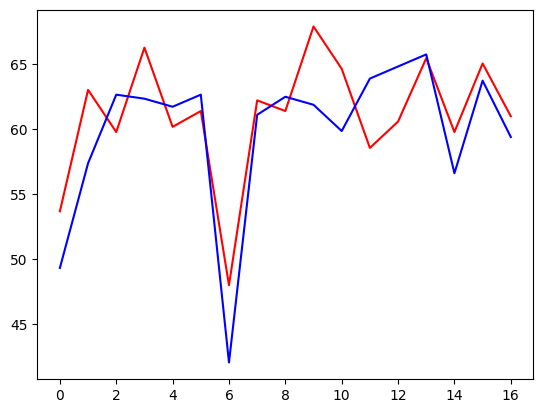

In [40]:
# show a training run of each mammography configuration
filters = {'data': 'mammo-cbis', 'transfer': 'end2end', 'patience': 7}
filtered_df = df
for filter in filters.items():
    key, value = filter
    filtered_df = filtered_df.where(filtered_df[key] == value).dropna()
display(filtered_df)
# take the first row of the filtered df, and show its training curve
row = filtered_df.iloc[0]
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')

    


In [44]:

filters = {'data': 'mammo-cbis', 'transfer': 'prompt50', 'patience': 7}
filtered_df = df
for filter in filters.items():
    key, value = filter
    filtered_df = filtered_df.where(filtered_df[key] == value).dropna()
display(filtered_df)
# take the first row of the filtered df, and show its training curve
row = filtered_df.iloc[0]
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')

    

,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data


IndexError: single positional indexer is out-of-bounds

,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data
75,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,875.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,95.5,43.48,98.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:35:59,"([2.258, 2.3211, 1.8614, 1.8005, 1.777, 1.7902..."
76,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,9805.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,94.5,42.87,96.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:38:20,"([3.9087, 4.1669, 2.5929, 1.8905, 1.8284, 1.81..."
77,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,3172.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,95.5,41.38,96.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:36:11,"([2.2754, 3.1525, 1.9242, 1.8165, 1.8245, 1.76..."
78,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,8393.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,51.0,39.94,91.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:35:56,"([2.1155, 2.295, 1.8141, 1.7979, 1.7843, 1.798..."
79,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,4536.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,97.0,42.58,96.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:35:59,"([2.1531, 2.1165, 1.8527, 1.8949, 1.8016, 1.85..."


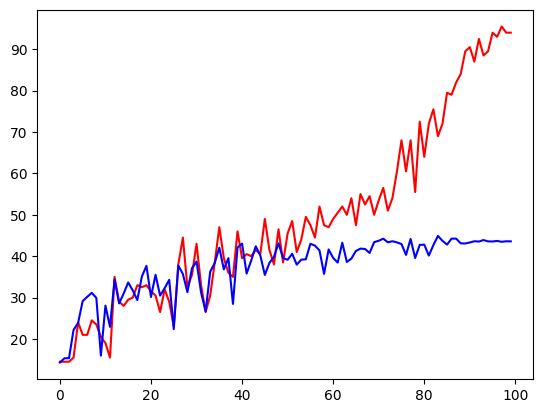

In [43]:

filters = {'data': 'vtab-dmlab', 'transfer': 'prompt50', 'patience': 300}
filtered_df = df
for filter in filters.items():
    key, value = filter
    filtered_df = filtered_df.where(filtered_df[key] == value).dropna()
display(filtered_df)
# take the first row of the filtered df, and show its training curve
row = filtered_df.iloc[0]
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')

    